**Q1**

In [29]:
import numpy as np

X = np.array([1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7], dtype=float)
y = np.array([39.0, 46.0, 47.0, 52.0, 56.0, 64.0, 65.0, 67.0, 68.0, 70.0], dtype=float)


**(A) Linear regression from scratch**

In [30]:
x_mean = X.mean()
y_mean = y.mean()

num = np.sum((X-x_mean)*(y-y_mean))
den = np.sum((X-x_mean)**2)
b1 = num/den
b0 = y_mean-b1*x_mean

print("Intercept (b0):", b0)
print("Slope (b1):", b1)

x_new = 4.5
y_pred = b0 + b1 * x_new
print("Predicted salary for 4.5 years (thousands):", y_pred)

y_hat = b0 + b1 * X
ss_res = np.sum((y - y_hat)**2)
ss_tot = np.sum((y - y_mean)**2)
r2 = 1 - ss_res/ss_tot
print("R^2:", r2)

Intercept (b0): 28.868740819869142
Slope (b1): 11.838696755241019
Predicted salary for 4.5 years (thousands): 82.14287621845372
R^2: 0.9787568578139395


**(B) Using scikit-learn**

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
X_2d = X.reshape(-1,1)
model = LinearRegression()
model.fit(X_2d,y)

print("Intercept (b0):", model.intercept_)
print("Slope (b1):", model.coef_[0])

y_pred = model.predict([[4.5]])[0]
print("Predicted salary for 4.5 years:", y_pred)

r2_sklearn = model.score(X_2d,y)
print("R^2:", r2_sklearn)

Intercept (b0): 28.868740819869146
Slope (b1): 11.838696755241017
Predicted salary for 4.5 years: 82.14287621845372
R^2: 0.9787568578139396


**Q2**

In [33]:
import pandas as pd
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("ScreenOnTime,BatteryLife.csv")
print(df.head())

   ScreenOnTime  BatteryLife
0           2.5           24
1           3.0           20
2           3.2           19
3           3.5           18
4           4.0           16


Correlation: -0.9744584074369302
p-value: 2.0308559548109216e-16
Intercept: 30.211494909962397
Slope: -3.3017633737164966
R^2: 0.9495691878245179


c:\Users\xt\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


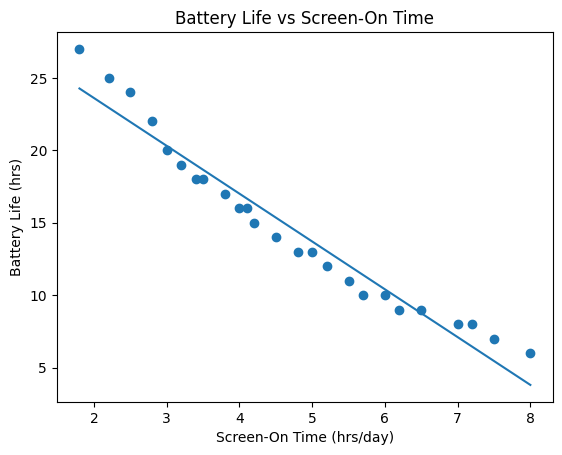

In [35]:
X = df[["ScreenOnTime"]]
y = df["BatteryLife"]

corr , p_value = pearsonr(df['ScreenOnTime'],df["BatteryLife"])
print("Correlation:", corr)
print("p-value:", p_value)

model = LinearRegression()
model.fit(X,y)
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R^2:", model.score(X, y))

plt.scatter(df['ScreenOnTime'],df["BatteryLife"])
x_line = pd.Series(sorted(df["ScreenOnTime"]))
y_line = model.predict(x_line.to_frame())
plt.plot(x_line,y_line)
plt.xlabel("Screen-On Time (hrs/day)")
plt.ylabel("Battery Life (hrs)")
plt.title("Battery Life vs Screen-On Time")
plt.show()

**Q3**

In [36]:
height = np.array([150, 155, 160, 165, 170, 175, 180], dtype=float)
weight = np.array([50, 55, 60, 63, 68, 72, 75], dtype=float)

Intercept:  -74.60714285714289
Slope:  0.8357142857142859
R^2:  0.9948401162790698


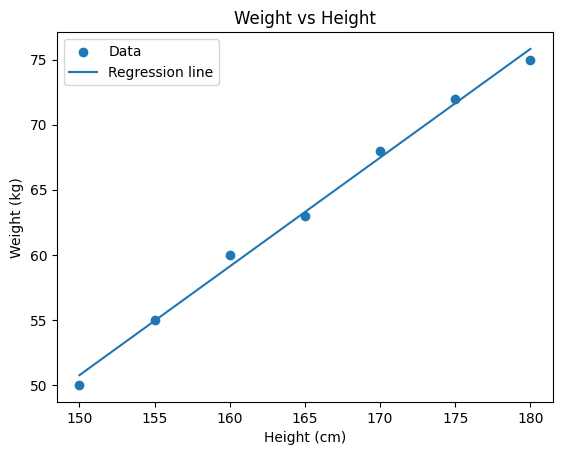

Predicted weight at 172 cm: 69.13571428571427
Residuals: [-0.75        0.07142857  0.89285714 -0.28571429  0.53571429  0.35714286
 -0.82142857]


In [37]:
X = height.reshape(-1,1)
y = weight

model = LinearRegression()
model.fit(X,y)

print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_[0])
print("R^2: ", model.score(X,y))

plt.scatter(height, weight, label="Data")
x_line = np.linspace(150, 180, 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, label="Regression line")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.legend()
plt.title("Weight vs Height")
plt.show()

# Predict weight at 172 cm
pred_172 = model.predict([[172]])[0]
print("Predicted weight at 172 cm:", pred_172)

# Residuals
y_pred = model.predict(X)
residuals = y - y_pred
print("Residuals:", residuals)

**Q4**

In [38]:
height = np.array([150, 155, 160, 165, 170, 175, 180], dtype=float)
weight = np.array([50, 55, 60, 63, 68, 72, 75], dtype=float)

X = height.reshape(-1, 1)
y = weight

model1 = LinearRegression()
model1.fit(X, y)

print("Without outlier:")
print("  Intercept:", model1.intercept_)
print("  Slope:", model1.coef_[0])
print("  R^2:", model1.score(X, y))

# Add outlier
height_out = np.append(height, 190)
weight_out = np.append(weight, 60)

X_out = height_out.reshape(-1, 1)
y_out = weight_out

model2 = LinearRegression()
model2.fit(X_out, y_out)

print("\nWith outlier (190, 60):")
print("  Intercept:", model2.intercept_)
print("  Slope:", model2.coef_[0])
print("  R^2:", model2.score(X_out, y_out))

Without outlier:
  Intercept: -74.60714285714289
  Slope: 0.8357142857142859
  R^2: 0.9948401162790698

With outlier (190, 60):
  Intercept: -6.31328320802001
  Slope: 0.41152882205513763
  R^2: 0.4215936647208235


**Q5**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score

Accuracy: 0.7552447552447552
Precision: 0.6842105263157895


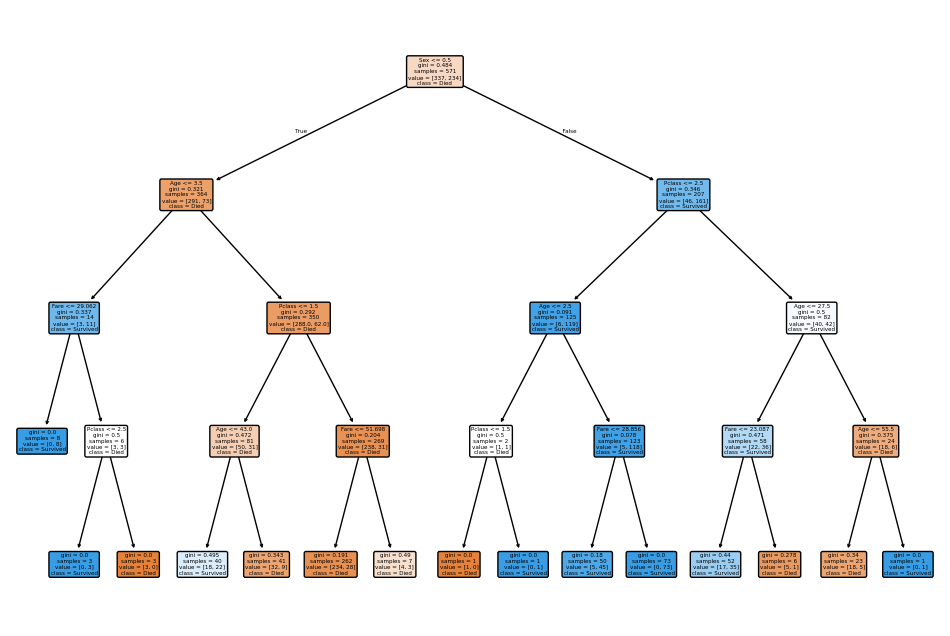

In [ ]:
df = pd.read_csv("train.csv")  

df = df[["Survived", "Pclass", "Sex", "Age", "Fare"]].dropna()

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

X = df[["Pclass", "Sex", "Age", "Fare"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)  # positive class = survived (1)
print("Accuracy:", acc)
print("Precision:", prec)

# Visualize tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Died", "Survived"],
          filled=True, rounded=True)
plt.show()

**Q6**

In [43]:
df = pd.read_csv("train.csv")

# Select columns
cols = ["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]
df = df[cols]

# Handle missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Encode categoricals
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Final accuracy:", acc)
print("Features used:", X.columns.tolist())

Final accuracy: 0.7988826815642458
Features used: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S']


C:\Users\xt\AppData\Local\Temp\ipykernel_16588\1033681835.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\xt\AppData\Local\Temp\ipykernel_16588\1033681835.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

**Q7**

In [44]:
from sklearn.cluster import KMeans

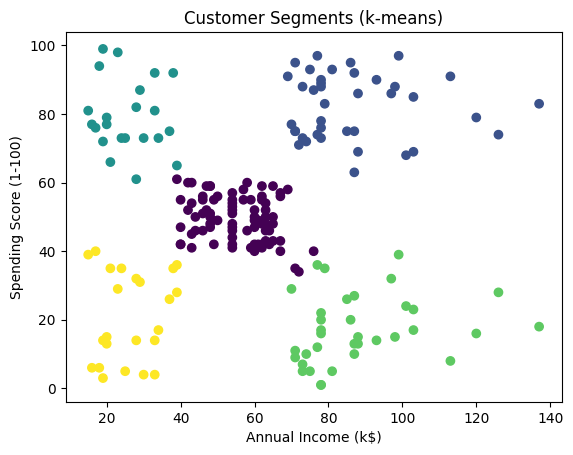

Cluster centers (Income, Spending):
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [46]:
df = pd.read_csv("Mall_Customers.csv")

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X)

df["Cluster"] = kmeans.labels_

plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"],
            c=df["Cluster"])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments (k-means)")
plt.show()

# For interpretation, print cluster centers
centers = kmeans.cluster_centers_
print("Cluster centers (Income, Spending):\n", centers)

**Q8**

In [ ]:
df = pd.read_csv("train.csv")

features = ["OverallQual", "GrLivArea", "GarageCars", "YearBuilt"]
X = df[features]
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Intercept:", model.intercept_)
print("Coefficients:")
for f, c in zip(features, model.coef_):
    print(f"  {f}: {c}")

print("R^2:", r2)
print("RMSE:", rmse)

KeyError: "None of [Index(['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt'], dtype='object')] are in the [columns]"

**Q9**

In [51]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("laptops.csv") 

features = ["Ram", "Weight", "Cpu_freq", "Storage"]
X = df[features]
y = df["Price"]   

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1) Unscaled
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)
print("Unscaled R^2:", r2_score(y_test, y_pred_unscaled))

# 2) Scaled
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
print("Scaled R^2:", r2_score(y_test, y_pred_scaled))

print("Scaled coefficients:")
for f, c in zip(features, model_scaled.coef_):
    print(f"  {f}: {c}")

**Q10**

In [ ]:
df = pd.read_csv("data.csv") 

features = ["Overall", "Potential", "Age", "International Reputation"]
df = df.dropna(subset=features + ["Value"])

X_full = df[features]
y = df["Value"]

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42
)

model_full = LinearRegression()
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)

print("Full model coefficients:")
for f, c in zip(features, model_full.coef_):
    print(f"  {f}: {c}")
print("Full model R^2:", r2_score(y_test, y_pred_full))

# Model without Potential
features_no_pot = ["Overall", "Age", "International Reputation"]
X_no_pot = df[features_no_pot]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_no_pot, y, test_size=0.2, random_state=42
)

model_no_pot = LinearRegression()
model_no_pot.fit(X_train2, y_train2)
y_pred_no_pot = model_no_pot.predict(X_test2)

print("\nWithout Potential:")
for f, c in zip(features_no_pot, model_no_pot.coef_):
    print(f"  {f}: {c}")
print("R^2 (no Potential):", r2_score(y_test2, y_pred_no_pot))